In [1]:
#import os
#from google.colab import drive
#drive.mount("/gdrive/")
#os.chdir("/gdrive/My Drive/FMA_Project/Jonathan")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive/


# Import Packages and Libraries

In [2]:
!pip freeze > requirements.txt

In [ ]:
import os
import numpy as np
from models import cnn, cnn_lstm, cnn_bi_lstm
from utils import f1_m, precision_m, recall_m, plot_graph
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tqdm import tqdm
import pandas as pd
random.seed(1)

# Loading Data

In [ ]:
train_x = np.load("train/features.npy")
train_y = np.load("train/classes.npy")

In [ ]:
genre = {
    "Hip-Hop": 0,
    "International": 1,
    "Electronic": 2,
    "Folk": 3,
    "Experimental": 4,
    "Rock": 5,
    "Pop": 6,
    "Instrumental": 7
}

#trans form genre to one hot encoded
train_y = np.vectorize(lambda x: genre.get(x))(train_y)
train_y = to_categorical(train_y, num_classes=8)

In [ ]:
#Scale images between 0 and 1
train_x = train_x/255.0

In [ ]:
#Add axis for grey scale
train_x = train_x[..., tf.newaxis].astype("float32")

# Shuffle and Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.10, shuffle=True)

# Initialize Models

In [ ]:
models = {"CNN": cnn, "CNNLSTM": cnn_lstm, "CNNBiLSTM": cnn_bi_lstm}

# Training and Testing of Models
Itertate over each model to train it and evaluate it over the best epoch based on minimum loss and maximum accuracy

Training CNN...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (32, 122, 122, 64)        3200      
_________________________________________________________________
batch_normalization (BatchNo (32, 122, 122, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (32, 61, 61, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 28, 28, 128)         401536    
_________________________________________________________________
batch_normalization_1 (Batch (32, 28, 28, 128)         512       
_________________________________________________________________
average_pooling2d_1 (Average (32, 14, 14, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 12, 12

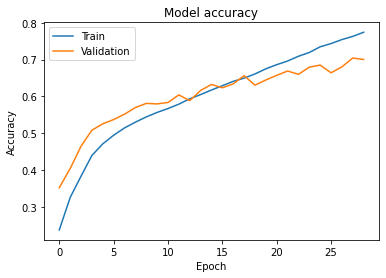

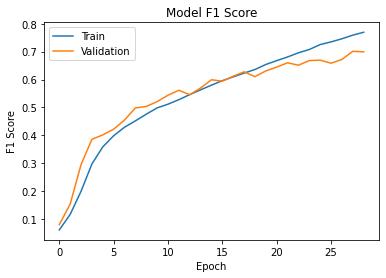

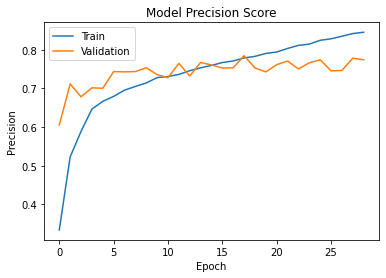

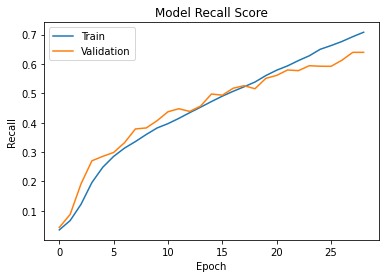

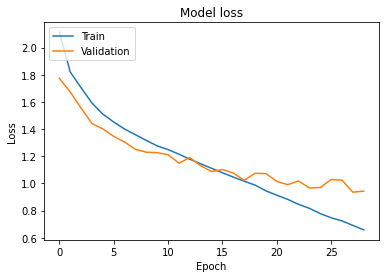

Kindly choose the best epoch to evaluate on: 28
250/250 [==============================] - 2s 10ms/step - loss: 0.9331 - accuracy: 0.6983 - f1_m: 0.6948 - precision_m: 0.7720 - recall_m: 0.6338
Would you like to save this checkpoint for recommendation?(Y/N)N
Kindly choose the best epoch to evaluate on: 29
250/250 [==============================] - 2s 9ms/step - loss: 0.9503 - accuracy: 0.6900 - f1_m: 0.6845 - precision_m: 0.7612 - recall_m: 0.6240
Would you like to save this checkpoint for recommendation?(Y/N)N
Kindly choose the best epoch to evaluate on: 28
250/250 [==============================] - 2s 9ms/step - loss: 0.9331 - accuracy: 0.6983 - f1_m: 0.6948 - precision_m: 0.7720 - recall_m: 0.6338
Would you like to save this checkpoint for recommendation?(Y/N)Y
Training CNNLSTM...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (32, 122, 122, 64)    

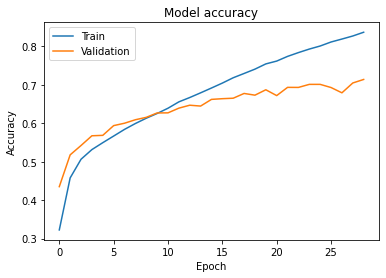

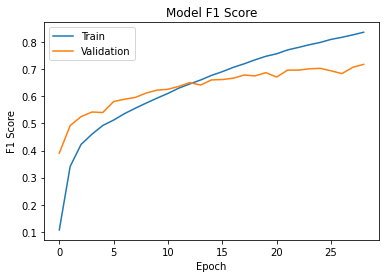

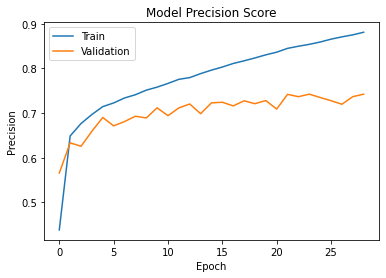

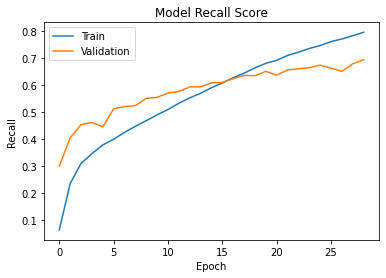

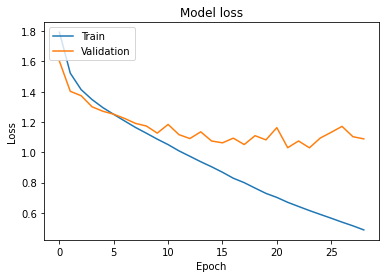

Kindly choose the best epoch to evaluate on: 24
250/250 [==============================] - 2s 10ms/step - loss: 0.9963 - accuracy: 0.7105 - f1_m: 0.7120 - precision_m: 0.7535 - recall_m: 0.6760
Would you like to save this checkpoint for recommendation?(Y/N)N
Kindly choose the best epoch to evaluate on: 29
250/250 [==============================] - 2s 10ms/step - loss: 1.0630 - accuracy: 0.7214 - f1_m: 0.7248 - precision_m: 0.7517 - recall_m: 0.7006
Would you like to save this checkpoint for recommendation?(Y/N)Y
Training CNNBiLSTM...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (32, 122, 122, 64)        3200      
_________________________________________________________________
batch_normalization_11 (Batc (32, 122, 122, 64)        256       
_________________________________________________________________
average_pooling2d_8 (Average (32, 61, 61, 

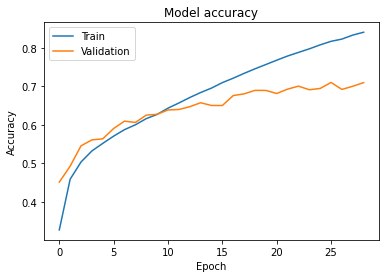

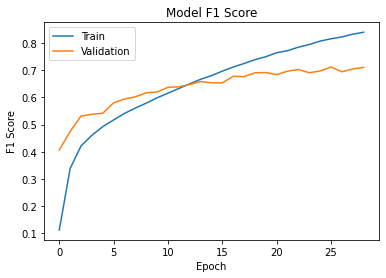

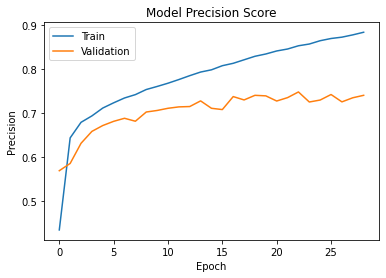

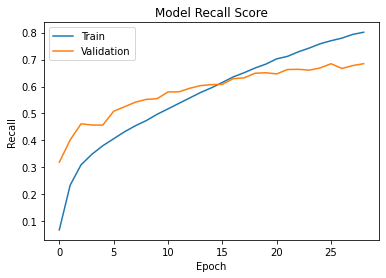

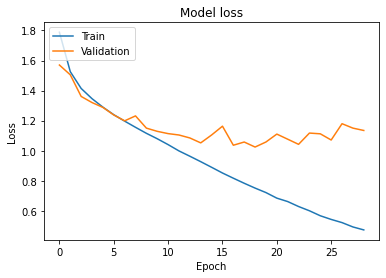

Kindly choose the best epoch to evaluate on: 26
250/250 [==============================] - 3s 10ms/step - loss: 1.0313 - accuracy: 0.7168 - f1_m: 0.7161 - precision_m: 0.7465 - recall_m: 0.6889
Would you like to save this checkpoint for recommendation?(Y/N)Y


In [ ]:
for name, model in models.items():
    
    print(f"Training {name}...")
    model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-05), metrics=['accuracy',f1_m,precision_m, recall_m])
    model.build((32, 128, 128, 1))
    model.summary()
    
    model_img="./img"
    if not os.path.exists(model_img):
        os.mkdir(model_img)
    plot_model(model, to_file = model_img + f'/{name}.png')
    
    checkpoint_path = f"./checkpoint/{name}"
    if not os.path.exists(checkpoint_path):
        os.makedirs(checkpoint_path)
    
    checkpoint_filepath = checkpoint_path + "/{epoch}.h5"
    model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    mode='max',
    save_best_only=False)
    
    epochs=29
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_split=0.1,
                        callbacks = [model_checkpoint_callback])
    
    
    plot_graph(history, epochs)
    
    rerun_test = True
    while(rerun_test):
        best_model = int(input("Kindly choose the best epoch to evaluate on: "))
        model.load_weights(checkpoint_path + f"/{best_model}.h5")

        model.evaluate(X_test, y_test, verbose=1)
        save = input("Would you like to save this checkpoint for recommendation?(Y/N)")
        model_save_path = "./best_models"

        if save=="N":
            rerun_test=True
        else:
          if not os.path.exists(model_save_path):
            os.mkdir(model_save_path)
          model.save(model_save_path+f"/{name}.h5")
          rerun_test=False